In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [2]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [3]:
tb = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/tb_sarc/quantification/allTB-ME_annotated.csv')
sarc = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/tb_sarc/quantification/allTB-sarcoid-scdata.csv')

In [5]:
tb

,SampleID,cellLabelInImage,cellSize,C,Na,HH3,Vimentin,SMA,Collagen.1,Lag3,...,ME0,ME1,ME2,ME3,ME4,ME5,ME6,ME7,maxME,PatientROI
0,6,2,169,0.911187,0.813581,0.765556,0.786841,0.0,0.000000,0.0,...,0.090232,0.001040,0.001040,0.330698,0.158915,0.001033,0.415994,0.001048,6,9_1
1,6,3,240,0.912404,0.857459,0.881312,0.726815,0.0,0.018747,0.0,...,0.134838,0.000926,0.000915,0.215228,0.206024,0.144544,0.296608,0.000916,6,9_1
2,6,4,40,0.890122,0.838072,0.839182,0.795838,0.0,0.000000,0.0,...,0.078748,0.000872,0.000876,0.261462,0.321105,0.000873,0.335185,0.000878,6,9_1
3,6,5,66,0.900242,0.861314,0.797691,0.509005,0.0,0.000000,0.0,...,0.000757,0.000759,0.000758,0.566916,0.285980,0.000759,0.143312,0.000758,3,9_1
4,6,6,386,0.891710,0.880452,0.910139,0.544552,0.0,0.000000,0.0,...,0.000740,0.000738,0.000739,0.715606,0.161058,0.000740,0.119640,0.000739,3,9_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39281,97,602,374,NaN,NaN,0.806602,0.392565,0.0,0.000000,0.0,...,0.009960,0.009944,0.343888,0.009963,0.009972,0.596342,0.009969,0.009963,5,6_2
39282,97,604,272,NaN,NaN,0.724414,0.287885,0.0,0.000000,0.0,...,0.009953,0.009937,0.343920,0.009954,0.009964,0.596355,0.009960,0.009956,5,6_2
39283,97,617,83,NaN,NaN,0.579460,0.000000,0.0,0.000000,0.0,...,0.021959,0.021910,0.021946,0.022003,0.021972,0.846253,0.021991,0.021966,5,6_2
39284,97,620,179,NaN,NaN,0.617340,0.000000,0.0,0.000000,0.0,...,0.015164,0.015157,0.015254,0.015161,0.015169,0.893760,0.015168,0.015167,5,6_2


In [3]:
sarc

,SampleID,cellLabelInImage,cellSize,C,Na,HH3,Vimentin,SMA,Collagen.1,Lag3,...,MPO,NaKATPase,HLA.Class.1,Ta,Au,Tissue,lineage,cell_type,cell_lin,PatientROI
0,6,2,169,0.911187,0.813581,0.765556,0.786841,0.0,0.000000,0.0,...,0.0,0.706893,0.823146,0.014510,0.080456,gran_vert,endothelial,endothelial,nonimmune,9_1
1,6,3,240,0.912404,0.857459,0.881312,0.726815,0.0,0.018747,0.0,...,0.0,0.692380,0.740648,0.068144,0.076104,gran_vert,endothelial,endothelial,nonimmune,9_1
2,6,4,40,0.890122,0.838072,0.839182,0.795838,0.0,0.000000,0.0,...,0.0,0.564155,0.715430,0.000000,0.058582,gran_vert,immune,CD16_CD14_Mono,myeloid,9_1
3,6,5,66,0.900242,0.861314,0.797691,0.509005,0.0,0.000000,0.0,...,0.0,0.403058,0.738303,0.036695,0.069880,gran_vert,immune,CD8_T,lymphocyte,9_1
4,6,6,386,0.891710,0.880452,0.910139,0.544552,0.0,0.000000,0.0,...,0.0,0.604402,0.688543,0.066717,0.087015,gran_vert,immune,CD4_T,lymphocyte,9_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56397,97,617,83,NaN,NaN,0.579460,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,0.844798,0.870990,gran_lung,immune,CD14_Mono,myeloid,6_2
56398,97,618,157,NaN,NaN,0.637259,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,0.657788,0.787749,gran_lung,immune,imm_other,other,6_2
56399,97,619,188,NaN,NaN,0.667161,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,0.658629,0.844937,gran_lung,immune,imm_other,other,6_2
56400,97,620,179,NaN,NaN,0.617340,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,0.858497,0.887397,gran_lung,immune,CD14_Mono,myeloid,6_2


In [4]:
sarc.rename(columns={'cellLabelInImage':'CellID'}, inplace=True)
sarc = reorder_columns(sarc, 'cellSize', 'Au')
sarc = reorder_columns(sarc, 'SampleID', 'cellSize')
sarc = reorder_columns(sarc, 'CellID', 'SampleID')
sarc = reorder_columns(sarc, 'cell_type', 'PatientROI')
sarc.drop(columns=['Tissue', 'CellID', 'SampleID'], inplace=True)

In [9]:
sarc

,C,Na,HH3,Vimentin,SMA,Collagen.1,Lag3,CD4,CD14,Foxp3,...,NaKATPase,HLA.Class.1,Ta,Au,cellSize,SampleID,lineage,cell_lin,PatientROI,cell_type
0,0.911187,0.813581,0.765556,0.786841,0.0,0.000000,0.0,0.660956,0.000000,0.0,...,0.706893,0.823146,0.014510,0.080456,169,6,endothelial,nonimmune,9_1,endothelial
1,0.912404,0.857459,0.881312,0.726815,0.0,0.018747,0.0,0.308791,0.605867,0.0,...,0.692380,0.740648,0.068144,0.076104,240,6,endothelial,nonimmune,9_1,endothelial
2,0.890122,0.838072,0.839182,0.795838,0.0,0.000000,0.0,0.564652,0.544975,0.0,...,0.564155,0.715430,0.000000,0.058582,40,6,immune,myeloid,9_1,CD16_CD14_Mono
3,0.900242,0.861314,0.797691,0.509005,0.0,0.000000,0.0,0.253260,0.070368,0.0,...,0.403058,0.738303,0.036695,0.069880,66,6,immune,lymphocyte,9_1,CD8_T
4,0.891710,0.880452,0.910139,0.544552,0.0,0.000000,0.0,0.710051,0.373022,0.0,...,0.604402,0.688543,0.066717,0.087015,386,6,immune,lymphocyte,9_1,CD4_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56397,NaN,NaN,0.579460,0.000000,0.0,0.000000,0.0,0.000000,0.201591,0.0,...,NaN,NaN,0.844798,0.870990,83,97,immune,myeloid,6_2,CD14_Mono
56398,NaN,NaN,0.637259,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,NaN,NaN,0.657788,0.787749,157,97,immune,other,6_2,imm_other
56399,NaN,NaN,0.667161,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,NaN,NaN,0.658629,0.844937,188,97,immune,other,6_2,imm_other
56400,NaN,NaN,0.617340,0.000000,0.0,0.000000,0.0,0.000000,0.189506,0.0,...,NaN,NaN,0.858497,0.887397,179,97,immune,myeloid,6_2,CD14_Mono


In [13]:
len(sarc['PatientROI'].unique())

40

In [14]:
len(sarc['SampleID'].unique())

40

In [15]:
tb

,SampleID,cellLabelInImage,cellSize,C,Na,HH3,Vimentin,SMA,Collagen.1,Lag3,...,ME0,ME1,ME2,ME3,ME4,ME5,ME6,ME7,maxME,PatientROI
0,6,2,169,0.911187,0.813581,0.765556,0.786841,0.0,0.000000,0.0,...,0.090232,0.001040,0.001040,0.330698,0.158915,0.001033,0.415994,0.001048,6,9_1
1,6,3,240,0.912404,0.857459,0.881312,0.726815,0.0,0.018747,0.0,...,0.134838,0.000926,0.000915,0.215228,0.206024,0.144544,0.296608,0.000916,6,9_1
2,6,4,40,0.890122,0.838072,0.839182,0.795838,0.0,0.000000,0.0,...,0.078748,0.000872,0.000876,0.261462,0.321105,0.000873,0.335185,0.000878,6,9_1
3,6,5,66,0.900242,0.861314,0.797691,0.509005,0.0,0.000000,0.0,...,0.000757,0.000759,0.000758,0.566916,0.285980,0.000759,0.143312,0.000758,3,9_1
4,6,6,386,0.891710,0.880452,0.910139,0.544552,0.0,0.000000,0.0,...,0.000740,0.000738,0.000739,0.715606,0.161058,0.000740,0.119640,0.000739,3,9_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39281,97,602,374,NaN,NaN,0.806602,0.392565,0.0,0.000000,0.0,...,0.009960,0.009944,0.343888,0.009963,0.009972,0.596342,0.009969,0.009963,5,6_2
39282,97,604,272,NaN,NaN,0.724414,0.287885,0.0,0.000000,0.0,...,0.009953,0.009937,0.343920,0.009954,0.009964,0.596355,0.009960,0.009956,5,6_2
39283,97,617,83,NaN,NaN,0.579460,0.000000,0.0,0.000000,0.0,...,0.021959,0.021910,0.021946,0.022003,0.021972,0.846253,0.021991,0.021966,5,6_2
39284,97,620,179,NaN,NaN,0.617340,0.000000,0.0,0.000000,0.0,...,0.015164,0.015157,0.015254,0.015161,0.015169,0.893760,0.015168,0.015167,5,6_2


In [5]:
tb.drop(columns=['Tissue', 'ME0', 'ME1', 'ME2', 'ME3', 'ME4', 'ME5', 'ME6', 'ME7', 'maxME', 'SampleID', 'cellLabelInImage'], inplace=True)
tb = reorder_columns(tb, 'cellSize', 'Au')
tb = reorder_columns(tb, 'SampleID', 'cellSize')
tb = reorder_columns(tb, 'cell_type', 'PatientROI')

In [25]:
tb

,C,Na,HH3,Vimentin,SMA,Collagen.1,Lag3,CD4,CD14,Foxp3,...,CD103,MastChyTry,MPO,NaKATPase,HLA.Class.1,Ta,Au,cellSize,PatientROI,cell_type
0,0.911187,0.813581,0.765556,0.786841,0.0,0.000000,0.0,0.660956,0.000000,0.0,...,0.0,0.0,0.0,0.706893,0.823146,0.014510,0.080456,169,9_1,endothelial
1,0.912404,0.857459,0.881312,0.726815,0.0,0.018747,0.0,0.308791,0.605867,0.0,...,0.0,0.0,0.0,0.692380,0.740648,0.068144,0.076104,240,9_1,endothelial
2,0.890122,0.838072,0.839182,0.795838,0.0,0.000000,0.0,0.564652,0.544975,0.0,...,0.0,0.0,0.0,0.564155,0.715430,0.000000,0.058582,40,9_1,CD16_CD14_Mono
3,0.900242,0.861314,0.797691,0.509005,0.0,0.000000,0.0,0.253260,0.070368,0.0,...,0.0,0.0,0.0,0.403058,0.738303,0.036695,0.069880,66,9_1,CD8_T
4,0.891710,0.880452,0.910139,0.544552,0.0,0.000000,0.0,0.710051,0.373022,0.0,...,0.0,0.0,0.0,0.604402,0.688543,0.066717,0.087015,386,9_1,CD4_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39281,NaN,NaN,0.806602,0.392565,0.0,0.000000,0.0,0.000000,0.301402,0.0,...,NaN,0.0,0.0,NaN,NaN,0.739760,0.752935,374,6_2,CD14_Mono
39282,NaN,NaN,0.724414,0.287885,0.0,0.000000,0.0,0.000000,0.287215,0.0,...,NaN,0.0,0.0,NaN,NaN,0.496954,0.704005,272,6_2,CD14_Mono
39283,NaN,NaN,0.579460,0.000000,0.0,0.000000,0.0,0.000000,0.201591,0.0,...,NaN,0.0,0.0,NaN,NaN,0.844798,0.870990,83,6_2,CD14_Mono
39284,NaN,NaN,0.617340,0.000000,0.0,0.000000,0.0,0.000000,0.189506,0.0,...,NaN,0.0,0.0,NaN,NaN,0.858497,0.887397,179,6_2,CD14_Mono


In [6]:
tb.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/tb_sarc/quantification/processed/allTB-ME_annotated_reshaped.csv', index=False)
sarc.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/tb_sarc/quantification/processed/allTB-sarcoid-scdata_reshaped.csv', index=False)

In [7]:
tb.drop(columns=['cell_lin', 'lineage'], inplace=True)
sarc.drop(columns=['cell_lin', 'lineage'], inplace=True)

In [8]:
tb.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/tb_sarc/quantification/processed/allTB-ME_annotated_reshaped_cleaned.csv', index=False)
sarc.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/tb_sarc/quantification/processed/allTB-sarcoid-scdata_reshaped_cleaned.csv', index=False)

In [90]:
data = [tb, sarc]

In [92]:
# original code replaced missing valeus with 0
for d in data:
    d.fillna(0, inplace=True)
    d.drop(columns=['C', 'Na', 'Ta', 'Au', 'HH3', 'NaKATPase'], inplace=True)

In [94]:
tb.columns[tb.columns.get_loc('cellSize'):]

Index(['cellSize', 'cell_type'], dtype='object')

In [95]:
X_columns = tb.columns[:tb.columns.get_loc('cellSize')]
obs_columns = tb.columns[tb.columns.get_loc('cellSize'):]
adata_tb = ad.AnnData(
    X=tb[X_columns],
    obs=tb[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [97]:
X_columns = sarc.columns[:tb.columns.get_loc('cellSize')]
obs_columns = sarc.columns[tb.columns.get_loc('cellSize'):]
adata_sarc = ad.AnnData(
    X=sarc[X_columns],
    obs=sarc[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [98]:
ad_list = [adata_tb, adata_sarc]

In [99]:
for add in ad_list:
    add.raw = add.copy()
    add.X = np.arcsinh(add.X/5)
    add.layers['zscore'] = z_score_normalization(add.X)


In [60]:
adata_tb.X


array([[0.15672581, 0.        , 0.        , ..., 0.16389445, 0.00290204,
        0.01609048],
       [0.14485581, 0.        , 0.00374947, ..., 0.14759312, 0.01362836,
        0.01522018],
       [0.15850309, 0.        , 0.        , ..., 0.14260228, 0.        ,
        0.01171617],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.16816585,
        0.17332886],
       [0.        , 0.        , 0.        , ..., 0.        , 0.1708668 ,
        0.17656059],
       [0.        , 0.        , 0.        , ..., 0.        , 0.12518807,
        0.16098227]])

In [100]:
for add in ad_list:
    add.obs['cell_type'] = add.obs['cell_type'].astype('category')
    sc.pp.neighbors(add)
    sc.tl.umap(add)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


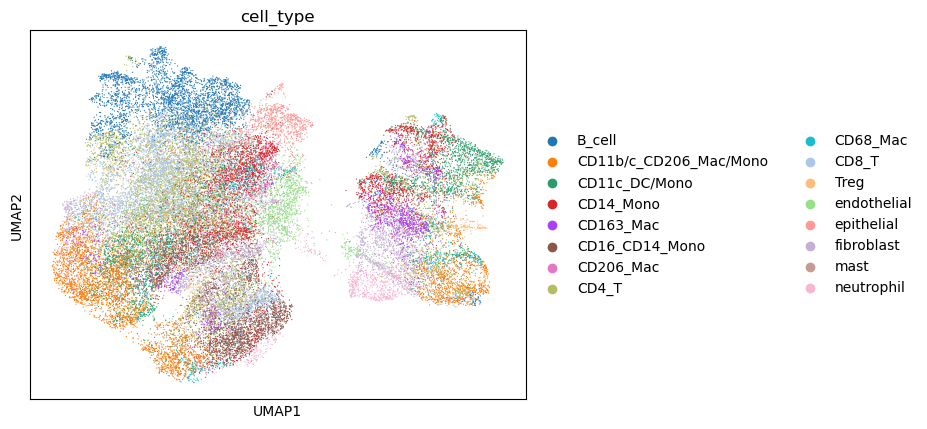

In [101]:
sc.pl.umap(adata_tb, color='cell_type')

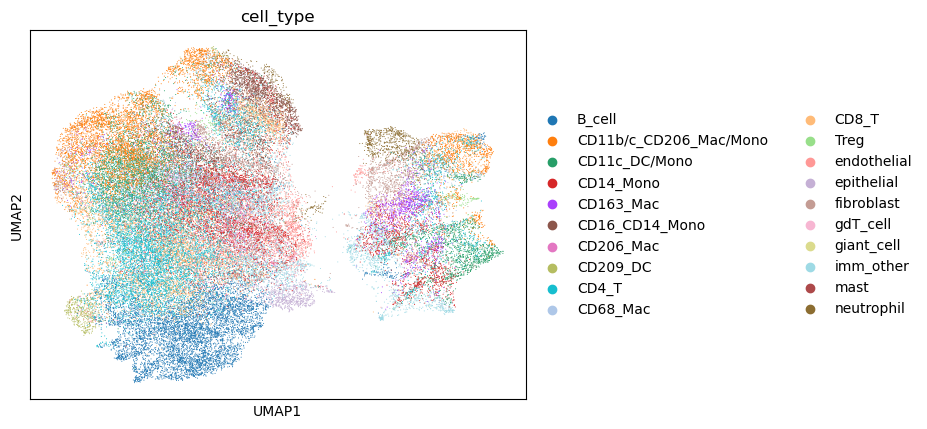

In [102]:
sc.pl.umap(adata_sarc, color='cell_type')

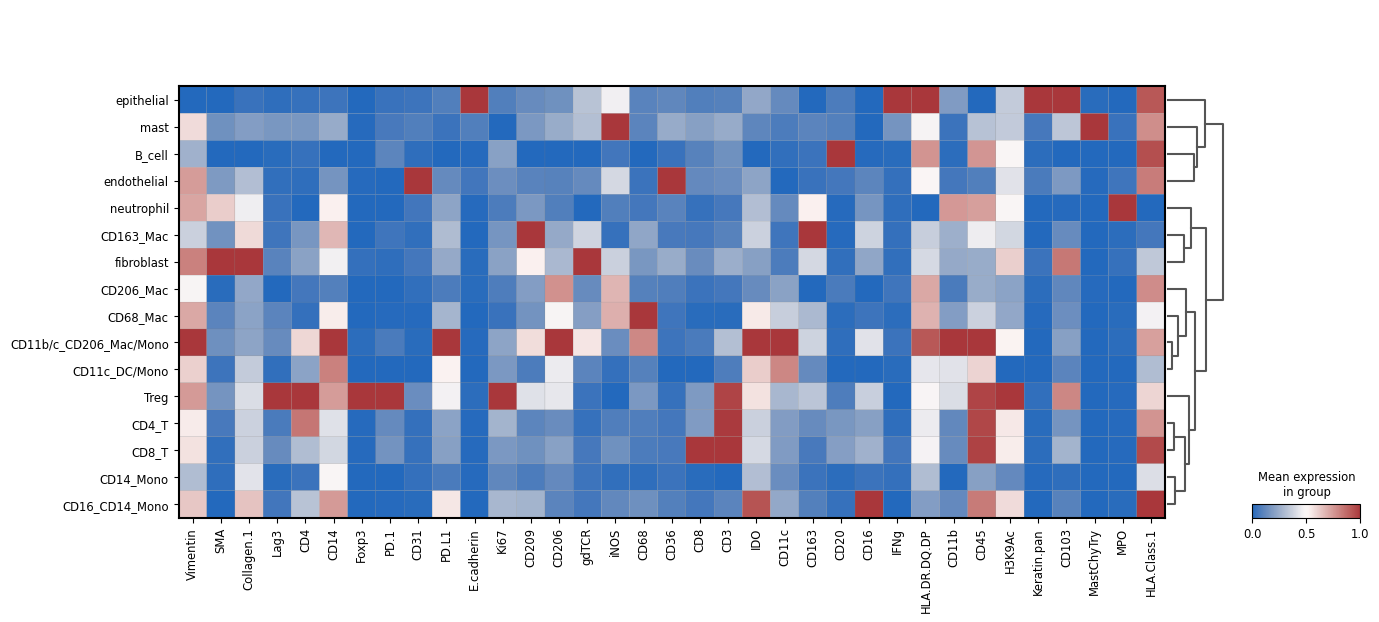

In [105]:
sc.pl.matrixplot(adata_tb, var_names=adata_tb.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

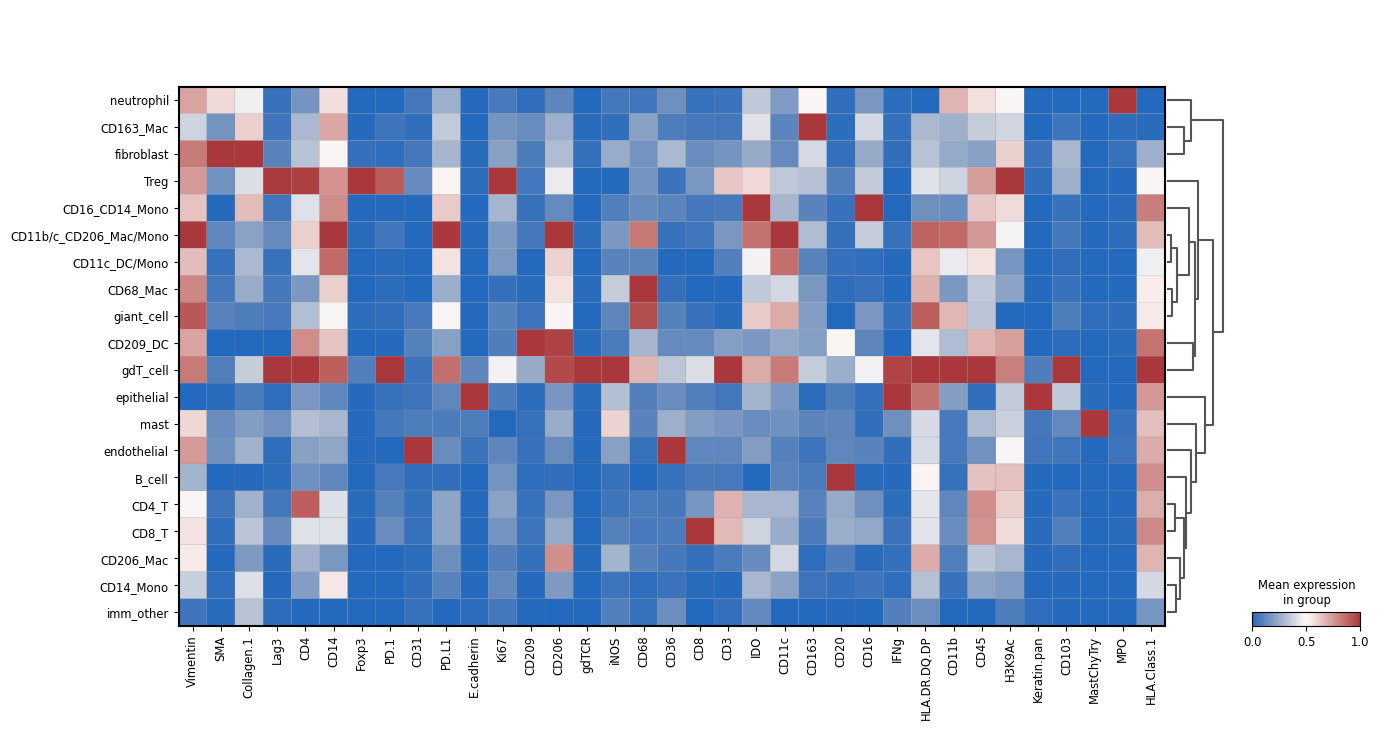

In [104]:
sc.pl.matrixplot(adata_sarc, var_names=adata_sarc.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

In [76]:
adata_tb.obs

,SampleID,cellLabelInImage,cellSize,Tissue,lineage,cell_type,cell_lin,ME0,ME1,ME2,ME3,ME4,ME5,ME6,ME7,maxME,PatientROI
0,6,2,169,gran_vert,endothelial,endothelial,nonimmune,0.090232,0.001040,0.001040,0.330698,0.158915,0.001033,0.415994,0.001048,6,9_1
1,6,3,240,gran_vert,endothelial,endothelial,nonimmune,0.134838,0.000926,0.000915,0.215228,0.206024,0.144544,0.296608,0.000916,6,9_1
2,6,4,40,gran_vert,immune,CD16_CD14_Mono,myeloid,0.078748,0.000872,0.000876,0.261462,0.321105,0.000873,0.335185,0.000878,6,9_1
3,6,5,66,gran_vert,immune,CD8_T,lymphocyte,0.000757,0.000759,0.000758,0.566916,0.285980,0.000759,0.143312,0.000758,3,9_1
4,6,6,386,gran_vert,immune,CD4_T,lymphocyte,0.000740,0.000738,0.000739,0.715606,0.161058,0.000740,0.119640,0.000739,3,9_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39281,97,602,374,gran_lung,immune,CD14_Mono,myeloid,0.009960,0.009944,0.343888,0.009963,0.009972,0.596342,0.009969,0.009963,5,6_2
39282,97,604,272,gran_lung,immune,CD14_Mono,myeloid,0.009953,0.009937,0.343920,0.009954,0.009964,0.596355,0.009960,0.009956,5,6_2
39283,97,617,83,gran_lung,immune,CD14_Mono,myeloid,0.021959,0.021910,0.021946,0.022003,0.021972,0.846253,0.021991,0.021966,5,6_2
39284,97,620,179,gran_lung,immune,CD14_Mono,myeloid,0.015164,0.015157,0.015254,0.015161,0.015169,0.893760,0.015168,0.015167,5,6_2


In [106]:
for add in ad_list:
    sc.tl.rank_genes_groups(add, groupby='cell_type' , method='wilcoxon')

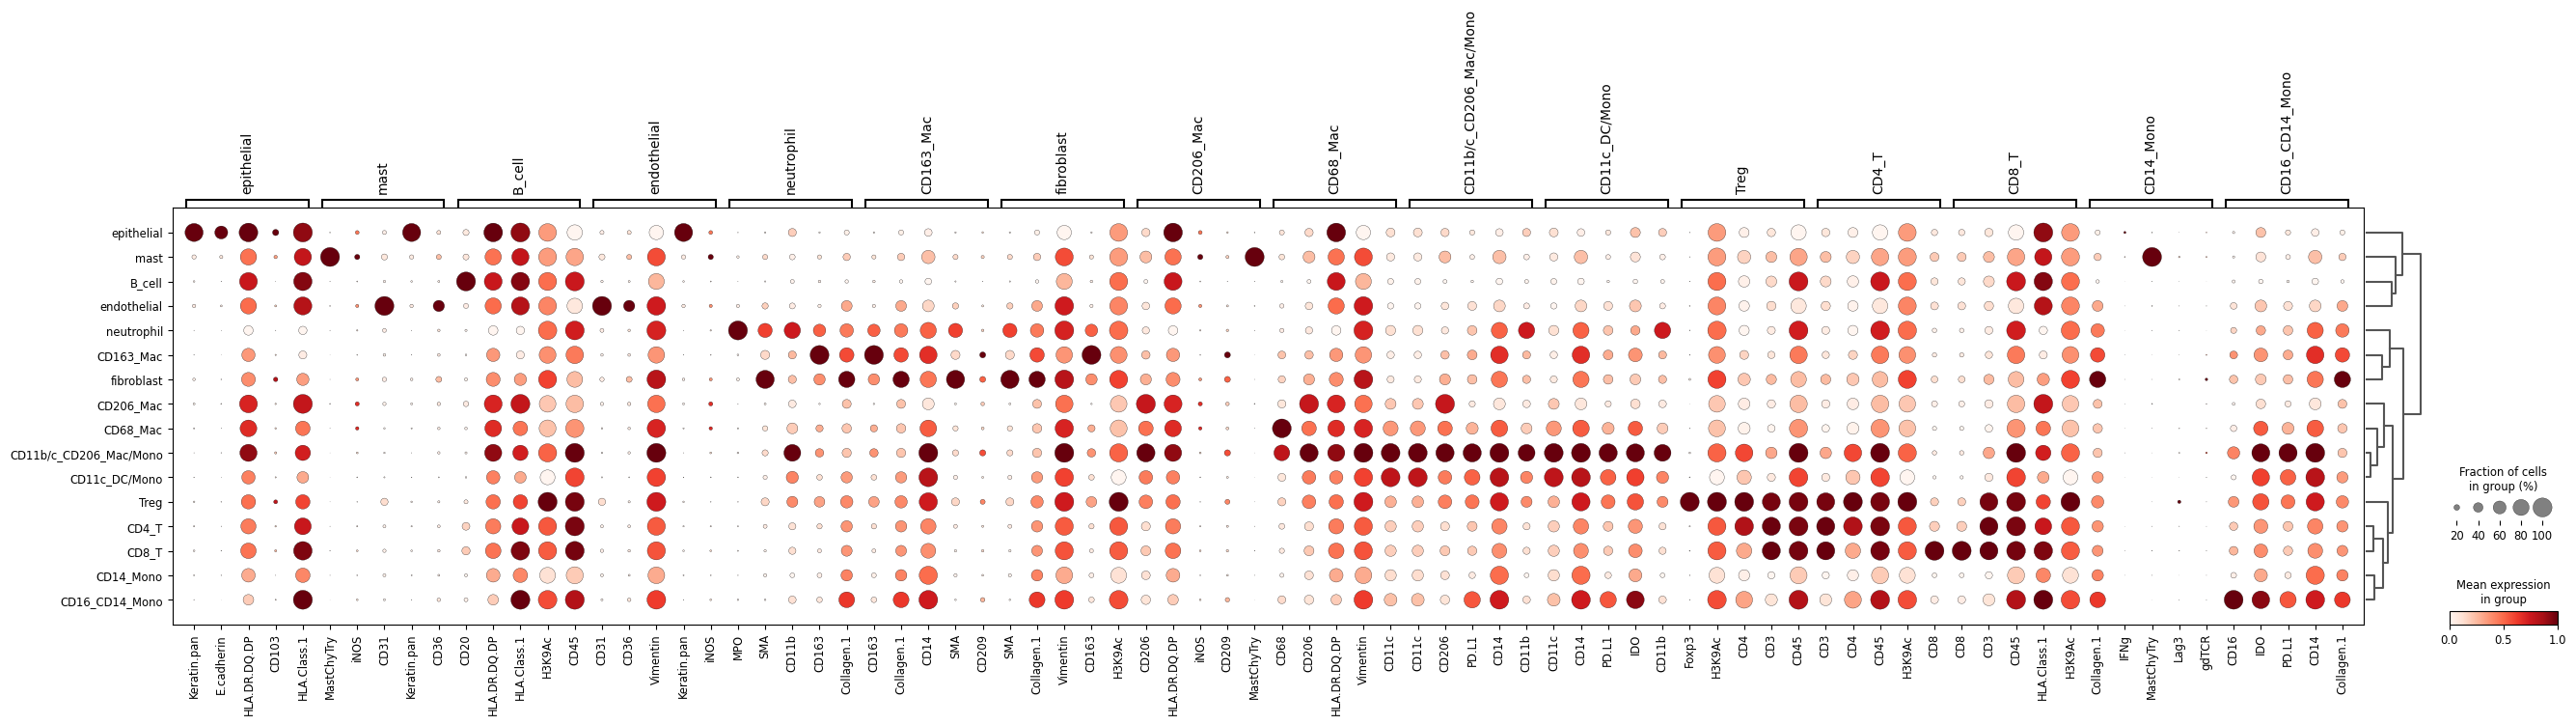

In [107]:
sc.pl.rank_genes_groups_dotplot(adata_tb, n_genes=5, standard_scale='var')

In [106]:
sc.tl.filter_rank_genes_groups(adata_tb, min_in_group_fraction=0.2, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')

categories: B_cell, CD11b/c_CD206_Mac/Mono, CD11c_DC/Mono, etc.
var_group_labels: B_cell, CD11b/c_CD206_Mac/Mono, CD11c_DC/Mono, etc.


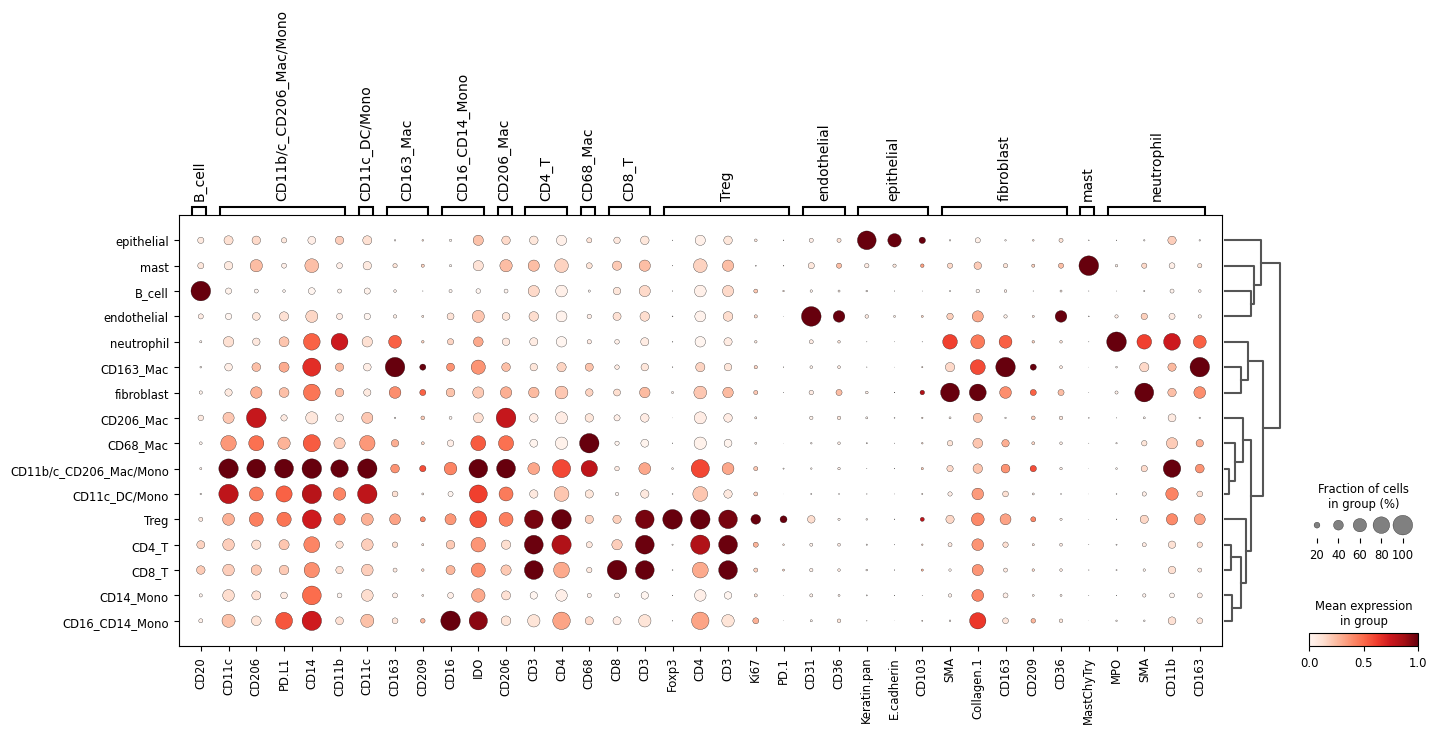

In [109]:
sc.pl.rank_genes_groups_dotplot(adata_tb, n_genes=5, standard_scale='var', key='rank_genes_groups_filtered')

categories: B_cell, CD11b/c_CD206_Mac/Mono, CD11c_DC/Mono, etc.
var_group_labels: B_cell, CD11b/c_CD206_Mac/Mono, CD11c_DC/Mono, etc.


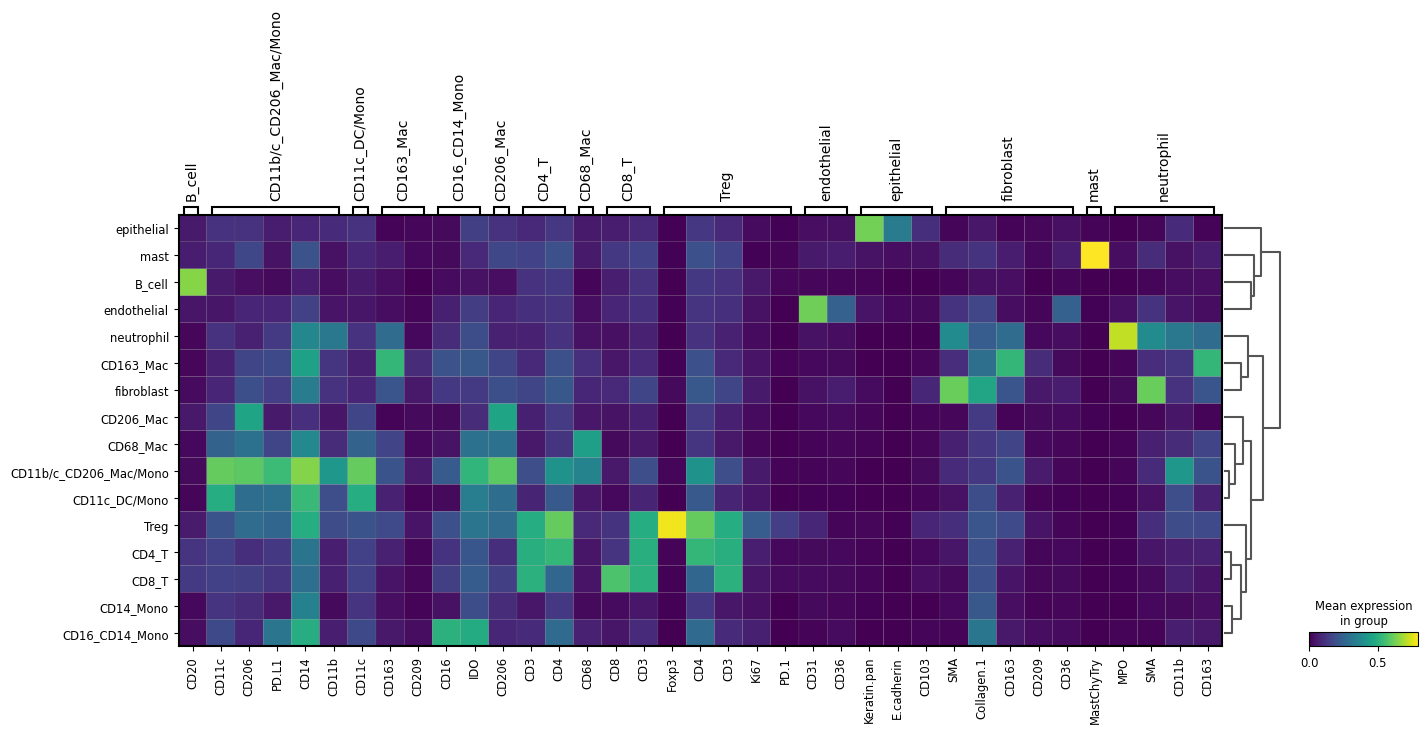

In [126]:
sc.pl.rank_genes_groups_matrixplot(adata_tb, n_genes=5, groupby="cell_type", key="rank_genes_groups_filtered")

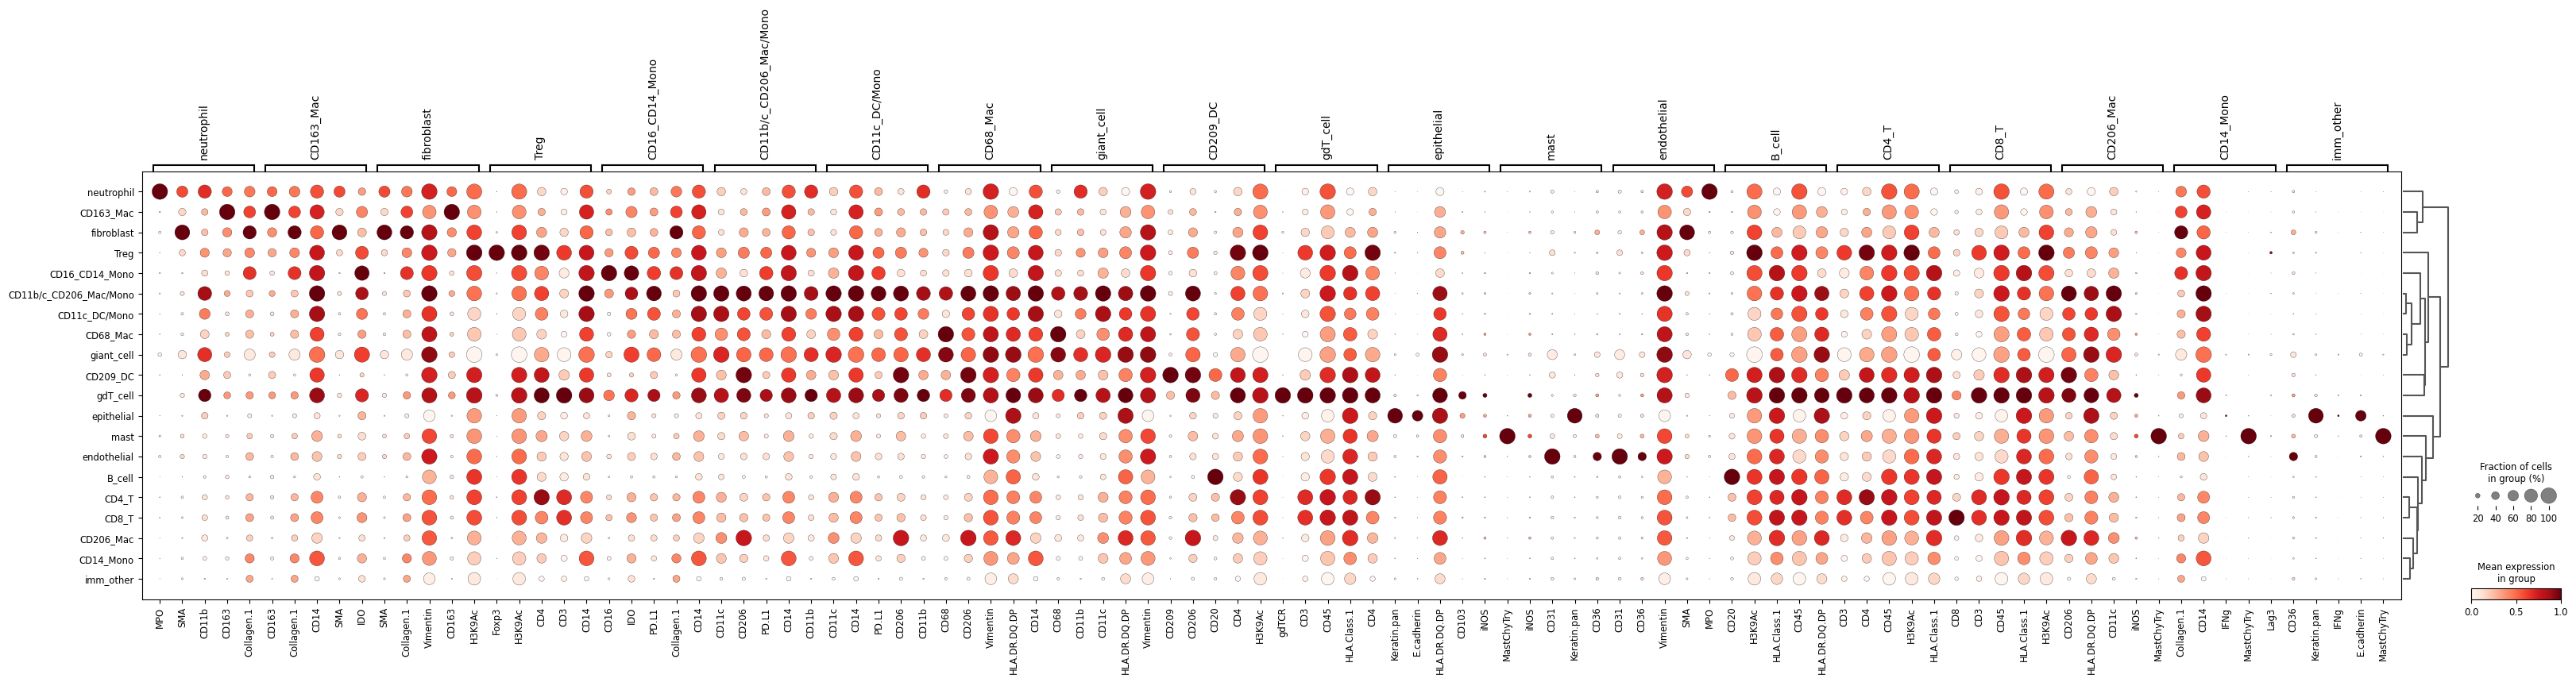

In [110]:
sc.pl.rank_genes_groups_dotplot(adata_sarc, n_genes=5, standard_scale='var')

In [111]:
sc.tl.filter_rank_genes_groups(adata_sarc, min_in_group_fraction=0.2, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')

categories: B_cell, CD11b/c_CD206_Mac/Mono, CD11c_DC/Mono, etc.
var_group_labels: B_cell, CD11b/c_CD206_Mac/Mono, CD11c_DC/Mono, etc.


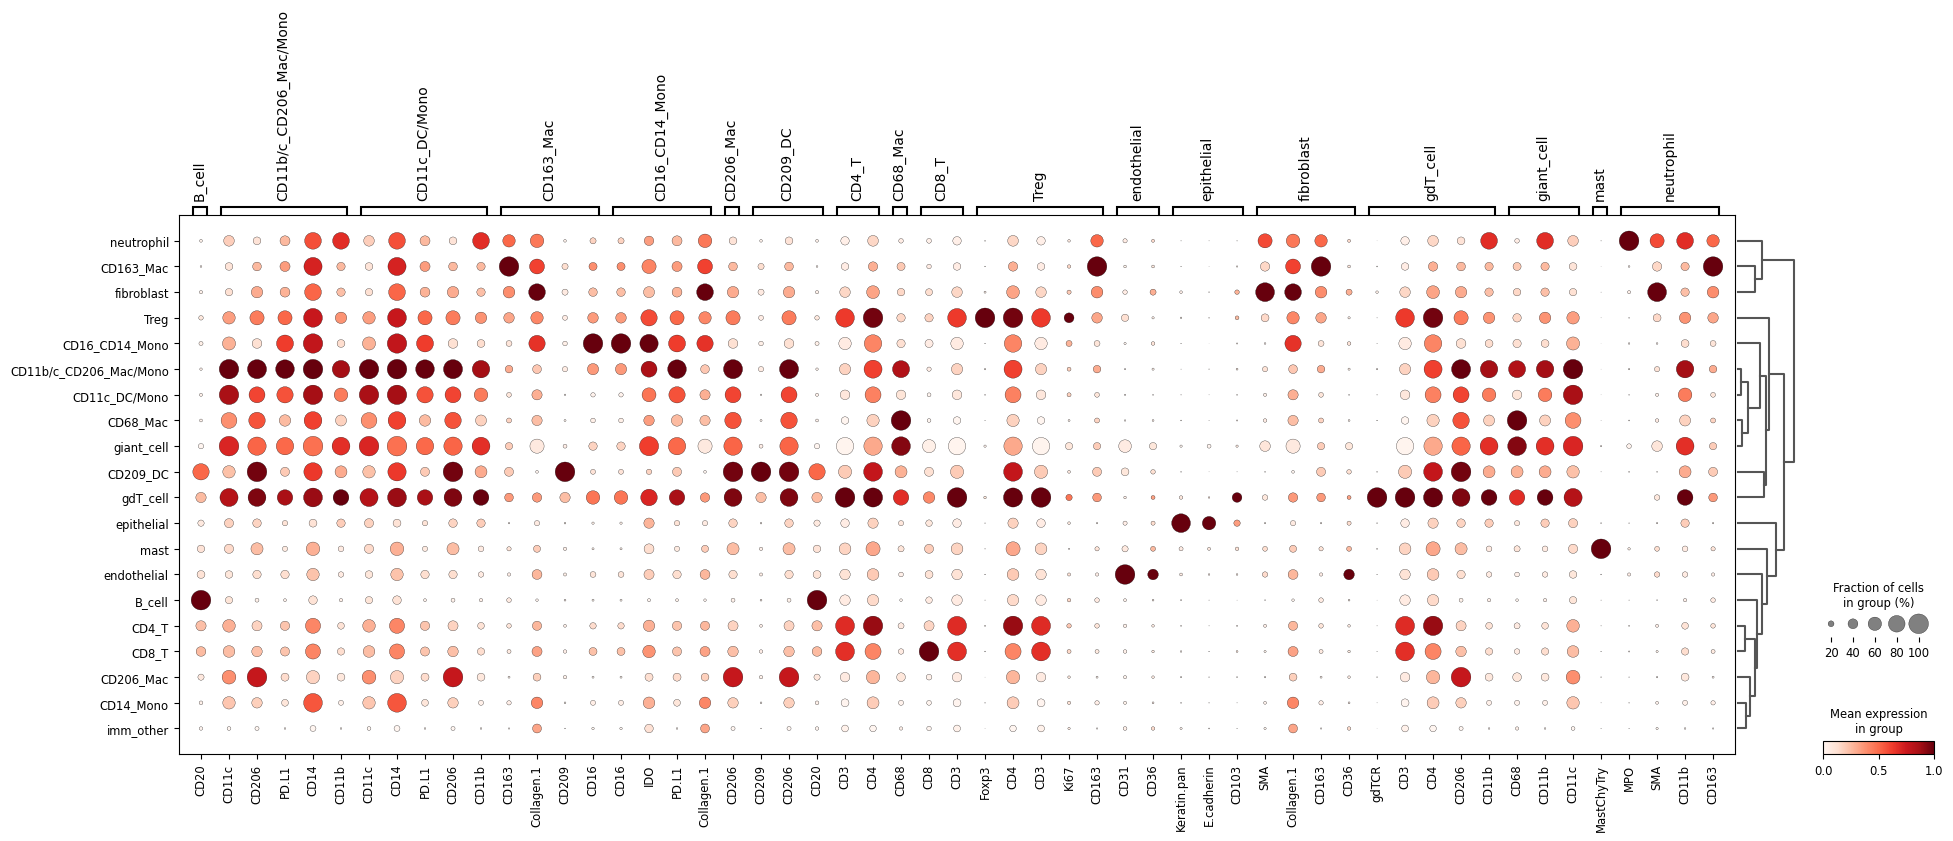

In [112]:
sc.pl.rank_genes_groups_dotplot(adata_sarc, n_genes=5, standard_scale='var', key='rank_genes_groups_filtered')

categories: B_cell, CD11b/c_CD206_Mac/Mono, CD11c_DC/Mono, etc.
var_group_labels: B_cell, CD11b/c_CD206_Mac/Mono, CD11c_DC/Mono, etc.


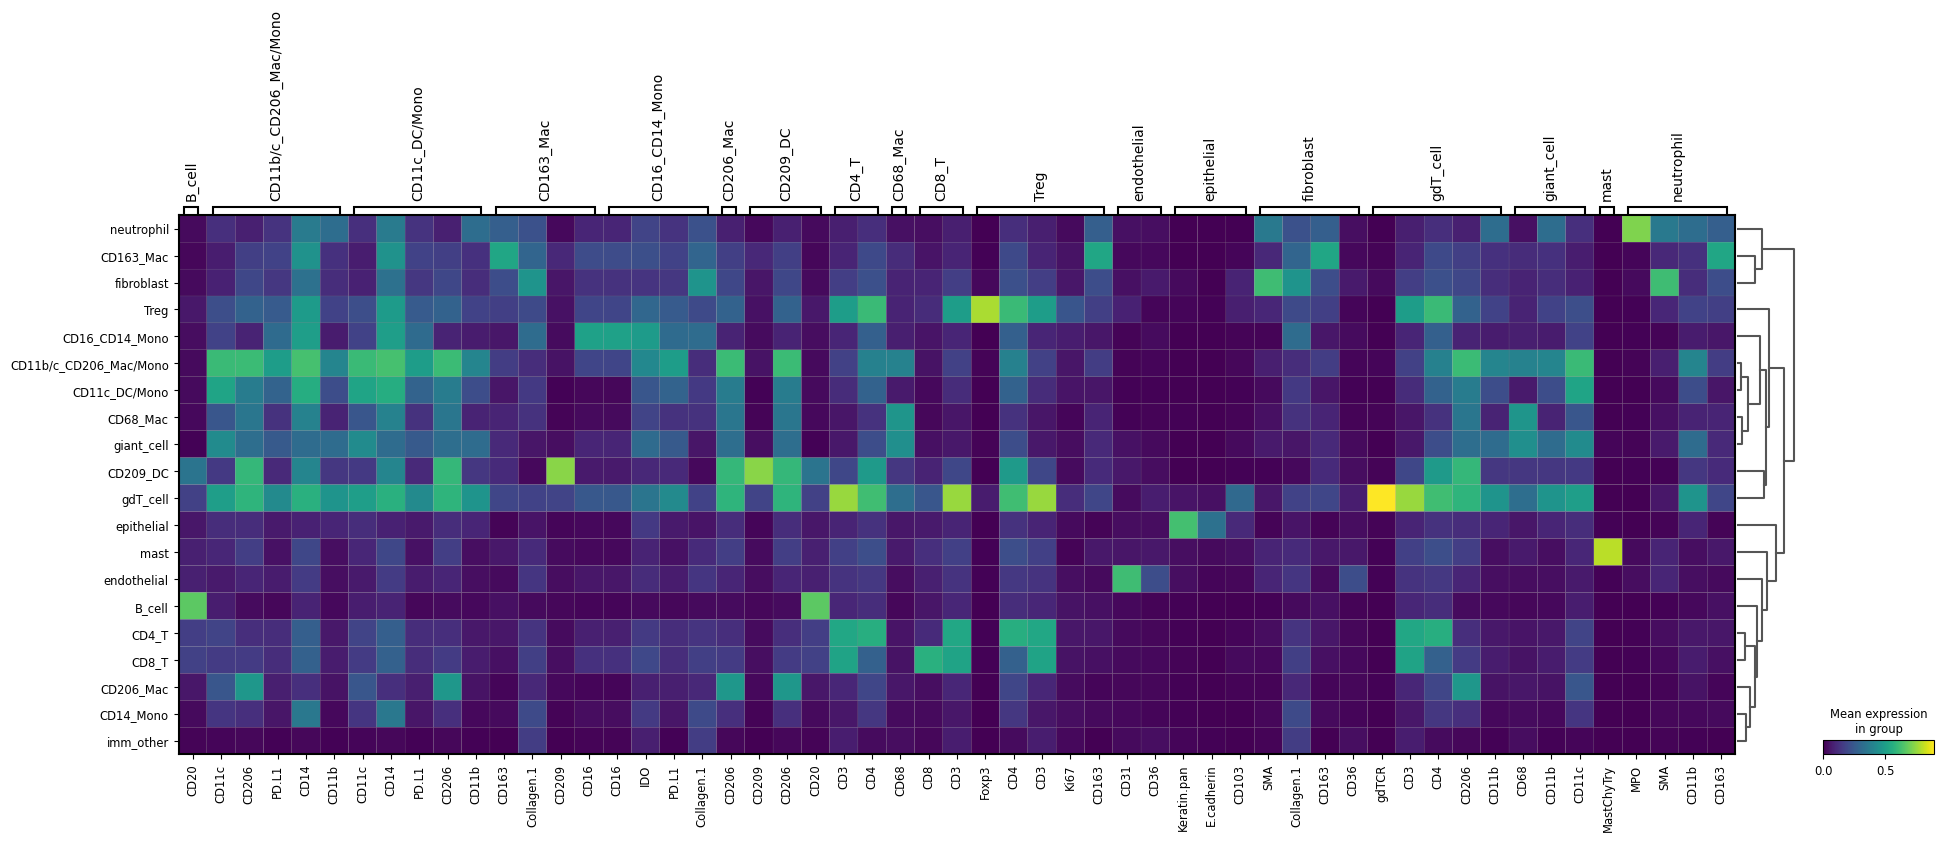

In [127]:
sc.pl.rank_genes_groups_matrixplot(adata_sarc, n_genes=5, groupby="cell_type", key="rank_genes_groups_filtered")

In [115]:
# Lets compare similar clusters
sc.tl.rank_genes_groups(adata_sarc, groupby='cell_type', groups=['CD11c_DC/Mono', 'CD209_DC', 'CD68_Mac'], reference='CD11b/c_CD206_Mac/Mono', method='wilcoxon', key_added='rank_genes_myeloid')

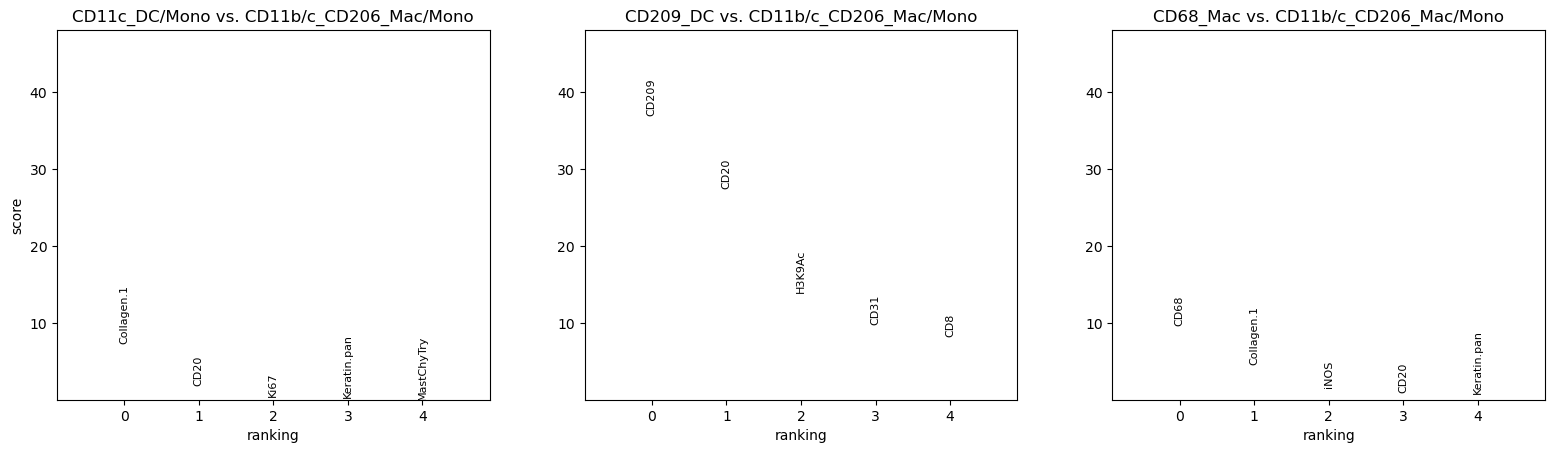

In [120]:
sc.pl.rank_genes_groups(adata_sarc, n_genes=5, key='rank_genes_myeloid')